<a href="https://colab.research.google.com/github/DikshaNarang20/jury-/blob/main/Sarcasm_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
# Loading the data

data = pd.read_json( "/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)

In [4]:
# Checking the shape of the data

data.shape

(28619, 3)

In [5]:
# Displaying the first ten rows of the dataset

data.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [6]:
# Checking for null values

data.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [7]:
# Checking for duplicate values

data.duplicated().sum()

2

In [8]:
# Removing the duplicate values

data.drop_duplicates(inplace=True)

In [9]:
# Checking if duplicate values are removed

data.duplicated().sum()

0

In [10]:
# Displaying the counts of is_sarcastic

data.is_sarcastic.value_counts()

0    14984
1    13633
Name: is_sarcastic, dtype: int64

In [11]:
# Displaying the datatypes of the columns of the dataset

data.dtypes


is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [12]:
# Dropping the article_link column using drop()

data.drop(columns=['article_link'], inplace=True)

In [13]:
# Lowering the text in the column headline

data["headline"] = data["headline"].str.lower()
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [14]:
# Removing the punctuations from the data

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["headline"] = data["headline"].apply(lambda text: remove_punctuation(text))
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...
2,0,eat your veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word stream...


In [15]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# Removing the Stop words from the data

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["headline"] = data["headline"].apply(lambda text: remove_stopwords(text))
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short g...
2,0,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streaming...


In [17]:
# Setting up counter to count word count

cnt = Counter()
for text in data["headline"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('new', 1677),
 ('trump', 1389),
 ('man', 1373),
 ('report', 604),
 ('us', 601),
 ('one', 555),
 ('woman', 505),
 ('area', 494),
 ('says', 485),
 ('day', 475)]

In [18]:
# Removing the Frequent used words

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["headline"] = data["headline"].apply(lambda text: remove_freqwords(text))
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short g...
2,0,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streaming...


In [19]:
# Removing rarely occuring words from data

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

data["headline"] = data["headline"].apply(lambda text: remove_rarewords(text))
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short g...
2,0,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streaming...


In [20]:
# Extra custom preprocessing

def preprocess_signs(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

data['headline'] = data['headline'].apply(preprocess_signs)
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short g...
2,0,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streaming...


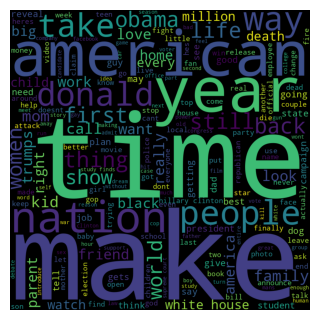

In [21]:
# Plotting the Word Cloud

data_ = " ".join(data["headline"])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(data_)
plt.figure(figsize = (3, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

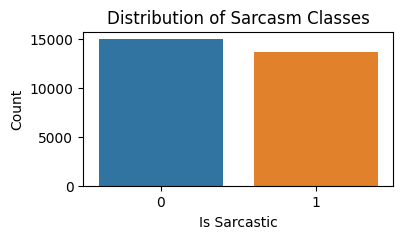

In [22]:
# Plotting the distribution of label classes

plt.figure(figsize=(4, 2))
sns.countplot(x='is_sarcastic', data=data)
plt.title('Distribution of Sarcasm Classes')
plt.xlabel('Is Sarcastic')
plt.ylabel('Count')
plt.show()

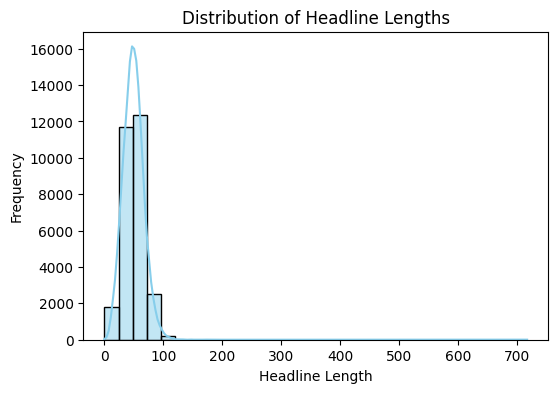

In [23]:
# Plotting the distribution of headline lengths
data['headline_length'] = data['headline'].apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(data['headline_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


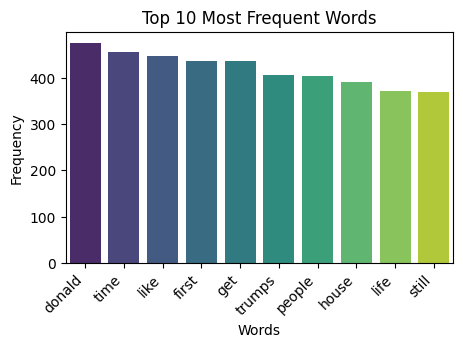

In [24]:
# Plotting the top N frequent words
cnt = Counter()
for text in data["headline"].values:
    for word in text.split():
        cnt[word] += 1
top_words = sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:10]
plt.figure(figsize=(5, 3))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

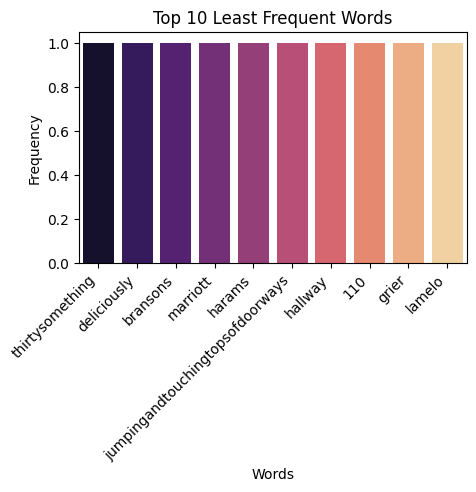

In [25]:
# Counting word occurrences
cnt = Counter()
for text in data["headline"].values:
    for word in text.split():
        cnt[word] += 1

# Sorting words by frequency in ascending order to get least frequent words
least_frequent_words = sorted(cnt.items(), key=lambda x: x[1])[:10]

# Creating a bar plot for the top 10 least frequent words
plt.figure(figsize=(5, 3))
sns.barplot(x=[word[0] for word in least_frequent_words], y=[word[1] for word in least_frequent_words], palette='magma')
plt.title('Top 10 Least Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [26]:
# Initializing and feeding the data to transform

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['headline'])
y = data['is_sarcastic']

In [27]:
# Splitting the dataset into training dataset and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [28]:
# Initialization of Logistic Regression Model

clf = LogisticRegression()

In [29]:
# Feeding the training data

clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Evaluate the classifier on the test set

y_pred = clf.predict(X_test)

In [31]:
# Displaying the output

y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [32]:
# Calculating Accuracy Score and Displaying it

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc*100)

Accuracy: 78.56394129979036


In [33]:
# Calculating Confusion Matrix and Displaying it

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[2460  511]
 [ 716 2037]]


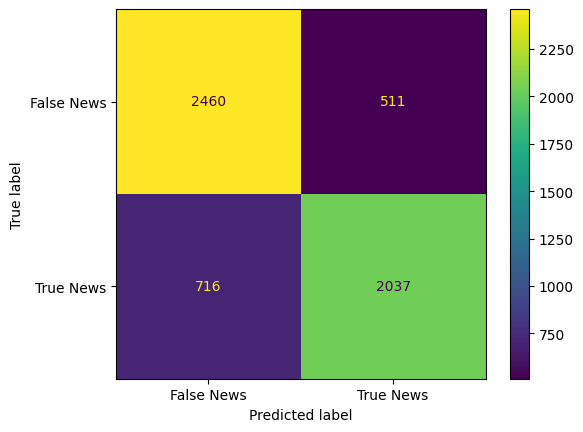

In [34]:
# Plotting the Confusion Matrix for Passive Aggressive

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["False News", "True News"])
disp.plot()
plt.show()

In [35]:
# Generating the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2971
           1       0.80      0.74      0.77      2753

    accuracy                           0.79      5724
   macro avg       0.79      0.78      0.78      5724
weighted avg       0.79      0.79      0.79      5724



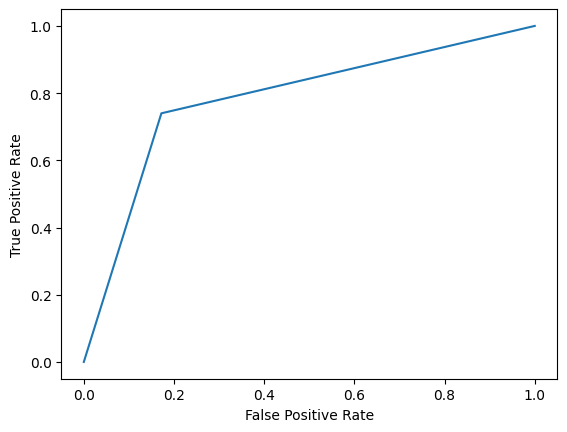

In [36]:
# Plotting ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

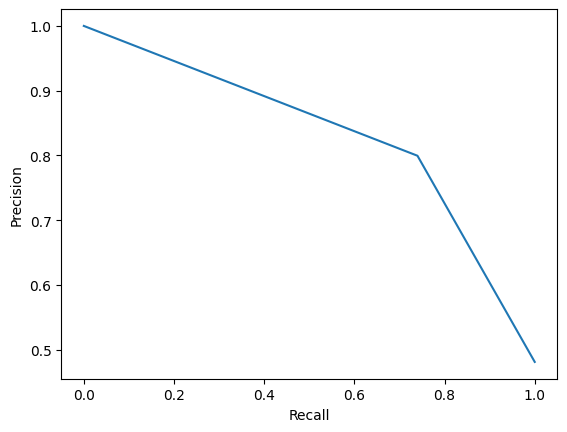

In [37]:
# plotting Precision Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [38]:
# Saving the model

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)